In [15]:
!pip install pillow
!pip install transformers
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install transformers torch accelerate sentencepiece
!pip install python-dotenv
!pip install groq

Looking in indexes: https://download.pytorch.org/whl/cpu


In [16]:
import os
from io import BytesIO
from IPython.display import display 
from PIL import Image
import base64
import requests
from transformers import pipeline
from transformers import AutoModelForCausalLM, AutoTokenizer
from dotenv import load_dotenv
from huggingface_hub import login
from groq import Groq

In [17]:
load_dotenv()

True

In [18]:
hf_var=os.getenv("HF_TOKEN")

In [19]:
login(hf_var)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [20]:
from transformers import pipeline 

get_completion = pipeline("image-to-text", model = "Salesforce/blip-image-captioning-base")


Device set to use cpu


In [21]:
image_path = "Cat03.jpg"  

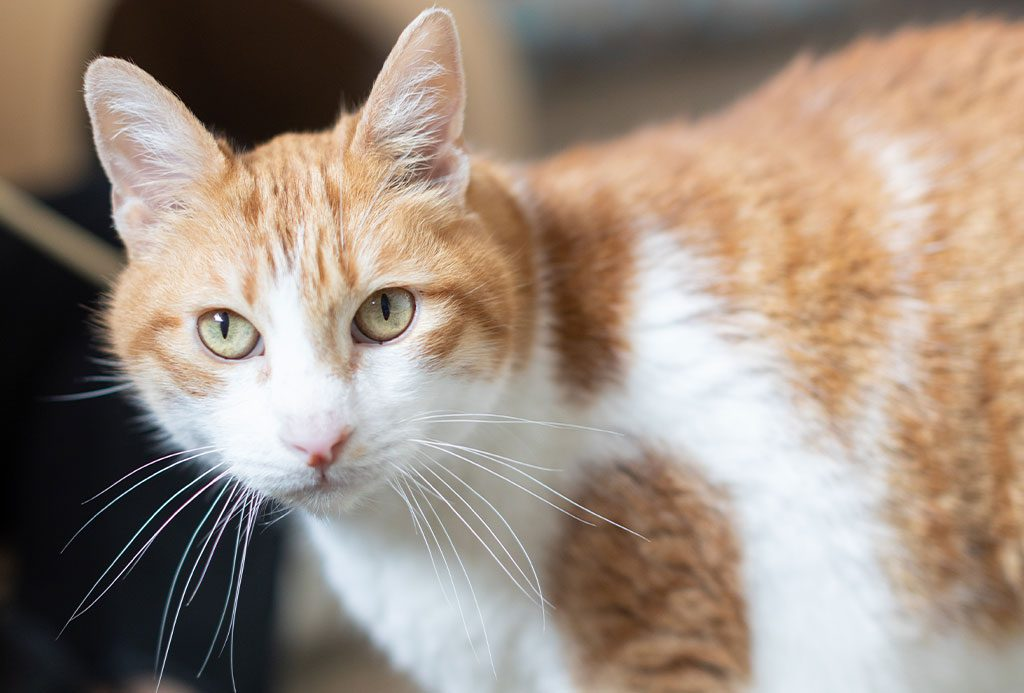

In [22]:
from PIL import Image
from IPython.display import display 

def show_image(image_path):
    image = Image.open(image_path)
    display(image) 
show_image(image_path)

In [23]:

def generate_completion(image_path):
    get_completion = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
    
    # Abre la imagen
    image = Image.open(image_path)
    
    # Genera la descripción
    caption = get_completion(image)
    
    return caption[0]['generated_text']

image_path = "Cat03.jpg"  
description = generate_completion(image_path)

print("Descripción generada:", description)

Device set to use cpu


Descripción generada: a cat with a white face


In [24]:

# Obtener la API Key desde las variables de entorno
api_key = os.getenv("GROQ_API_KEY")

if not api_key:
    raise ValueError("❌ GROQ_API_KEY no está configurado en las variables de entorno.")

# Crear instancia del cliente Groq
client = Groq(api_key=api_key)

# Descripción de la imagen
description = "A mystical forest where glowing creatures roam under a violet sky."

if not description.strip():
    raise ValueError("❌ La descripción de la imagen está vacía.")

# Generar la historia
chat_completion = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    messages=[
        {"role": "user", "content": f"Crea una historia con la siguiente descripción en español en un solo parrafo corto: {description}"},
    ],
)

# Imprimir la historia generada
print("\n📖 Historia Generada:\n")
print(chat_completion.choices[0].message.content)


📖 Historia Generada:

En el corazón de un bosque mágico, criaturas luminosas de colores íridescentes se desplazaban con gracia bajo un cielo violeta que parecía pulsar con una energía cósmica. Los árboles, cubiertos de flores que brillaban como estrellas, se alzaban hacia el firmamento, creando un túnel de luz que guiaba a los viajeros a través de la densa y exuberante vegetación. Mientras caminaban, el suelo parecía cantar con un suave murmullo, y el aire estaba lleno del dulce aroma de las flores, creando un ambiente de ensueño y misterio en este lugar donde la naturaleza y la magia se entrelazaban en armonía perfecta.


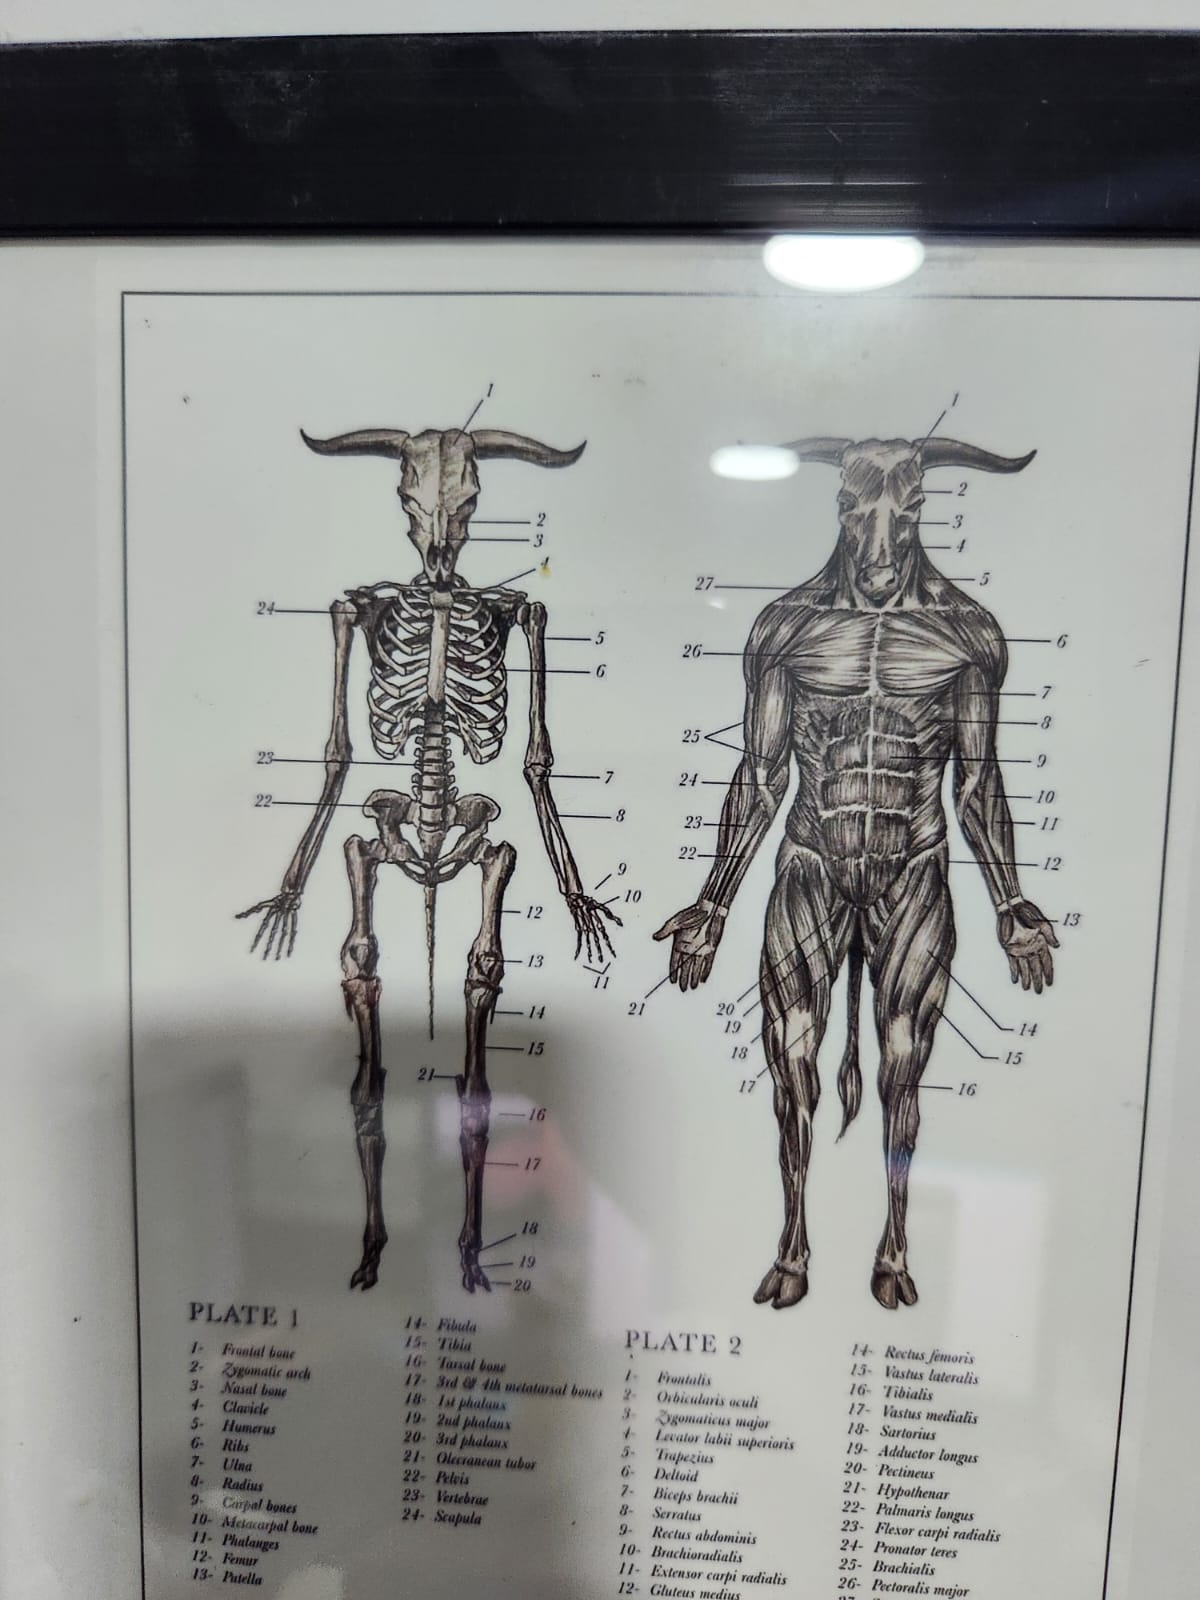

In [27]:
show_image("test_anatomy.jpeg")

In [28]:

image_path = "test_anatomy.jpeg" 
description = generate_completion(image_path)

print("Descripción generada:", description)

Device set to use cpu


Descripción generada: a framed picture of a goat and a goat skeleton
